<a href="https://colab.research.google.com/github/rafaelhamer/DSWP/blob/master/Fifa_Comparativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício 9
O arquivo FIFA.csv contem dados relacionados à última edição do FIFA 2018 (um dos jogos de video-game mais famosos) e traz os mais variados dados sobre os jogadores (exemplo): idade, nacionalidade, potencial, salário e etc. Faça o seguinte:

1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso);
2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
3. Qual o dtype de cada variável/atributo do dataframe?
4. Se alguma variávável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?
5. Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo;
6Há Missing values nos dados? Se sim, o qual sua proposta (proposta do grupo) para tratar estes Missing values?
7. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.
8. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality');
9. Qual a número de jogadores por idade?
10. Quantos jogadores possuem cada clube?
11. Qual a média de idade por clube?
12. Qual a média de salário por país?
13. Qual a média de salário por clube?
14. Qual a média de salário por idade?
15. Quanto cada clube gasta com pagamento de salários?
16. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?
17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?
18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?
19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.
20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?
21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?
22. Quem são os outliers em termos de salário?
23. Quem são os outliers em termos de potência no chute?





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [15, 12]
%matplotlib inline

In [3]:
# 1) Carregue os arquivos players_xx.csv
df_fifa18 = pd.read_csv('https://raw.githubusercontent.com/rafaelhamer/DSWP/master/Dataframes/players_18.csv', index_col=0)
df_fifa19 = pd.read_csv('https://raw.githubusercontent.com/rafaelhamer/DSWP/master/Dataframes/players_19.csv', index_col=0)
df_fifa20 = pd.read_csv('https://raw.githubusercontent.com/rafaelhamer/DSWP/master/Dataframes/players_20.csv', index_col=0)

In [ ]:
df_fifa20.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
# 2) Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
df_fifa18.drop(columns='player_url', inplace=True)
df_fifa19.drop(columns='player_url', inplace=True)
df_fifa20.drop(columns='player_url', inplace=True)

df_fifa20.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
# 3) Qual o dtype de cada variável/atributo do dataframe?

pd.set_option('max_rows', 200)
df_fifa20.dtypes

In [ ]:
pd.set_option('max_rows', 10)

In [ ]:
# 4) Se alguma variávável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?

def converte(euros):
  euros=euros.replace('€','')

  if euros.find('M') > 0: 
    f_valor = float(euros.replace('M','')) * 1000000
  elif euros.find('K') > 0: 
    f_valor = float(euros.replace('K','')) * 1000
  else:
    f_valor = float(euros)

  return f_valor

df_fifa['Value'] = df_fifa['Value'].apply(converte)
df_fifa['Wage'] = df_fifa['Wage'].apply(converte)
df_fifa

In [ ]:
# 5) Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo; 

df_fifa.columns = [col.lower() for col in df_fifa.columns]
df_fifa.head()

In [ ]:
# 6) Há Missing values nos dados? Se sim, o qual sua proposta (proposta do grupo) para tratar estes Missing values?

# SIM...

In [ ]:
# 6) Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.

#pd.value_counts(df_fifa20['nationality']).head(10)

df1 = df_fifa18.groupby('nationality').agg({'nationality':'count'}).rename(columns={'nationality':'total_18'})
df2 = df_fifa19.groupby('nationality').agg({'nationality':'count'}).rename(columns={'nationality':'total_19'})
df3 = df_fifa20.groupby('nationality').agg({'nationality':'count'}).rename(columns={'nationality':'total_20'})

df_total = pd.merge(df1, pd.merge(df2, df3, on='nationality'), on='nationality')

df_total['total'] = df_total['total_18'] + df_total['total_19'] + df_total['total_20']

df_total.sort_values('total', ascending=False, inplace=True)
df_total.head(10)

,total_18,total_19,total_20,total
nationality,,,,
England,1608,1656,1667,4931
Germany,1141,1191,1216,3548
Spain,1002,1037,1035,3074
France,958,892,984,2834
Argentina,964,943,886,2793
Brazil,799,816,824,2439
Italy,799,744,732,2275
Colombia,572,588,591,1751
Japan,460,455,453,1368


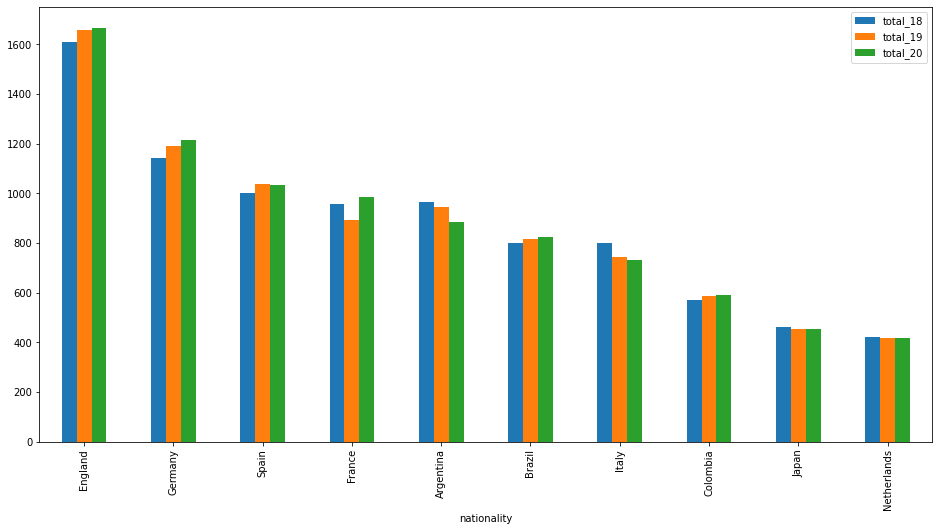

In [ ]:
#nat_total.plot(kind='pie',x='nationality',y='total',legend=False,figsize=(15,15))
df_total[['total_18','total_19','total_20']].head(10).plot.bar(figsize=(16,8))

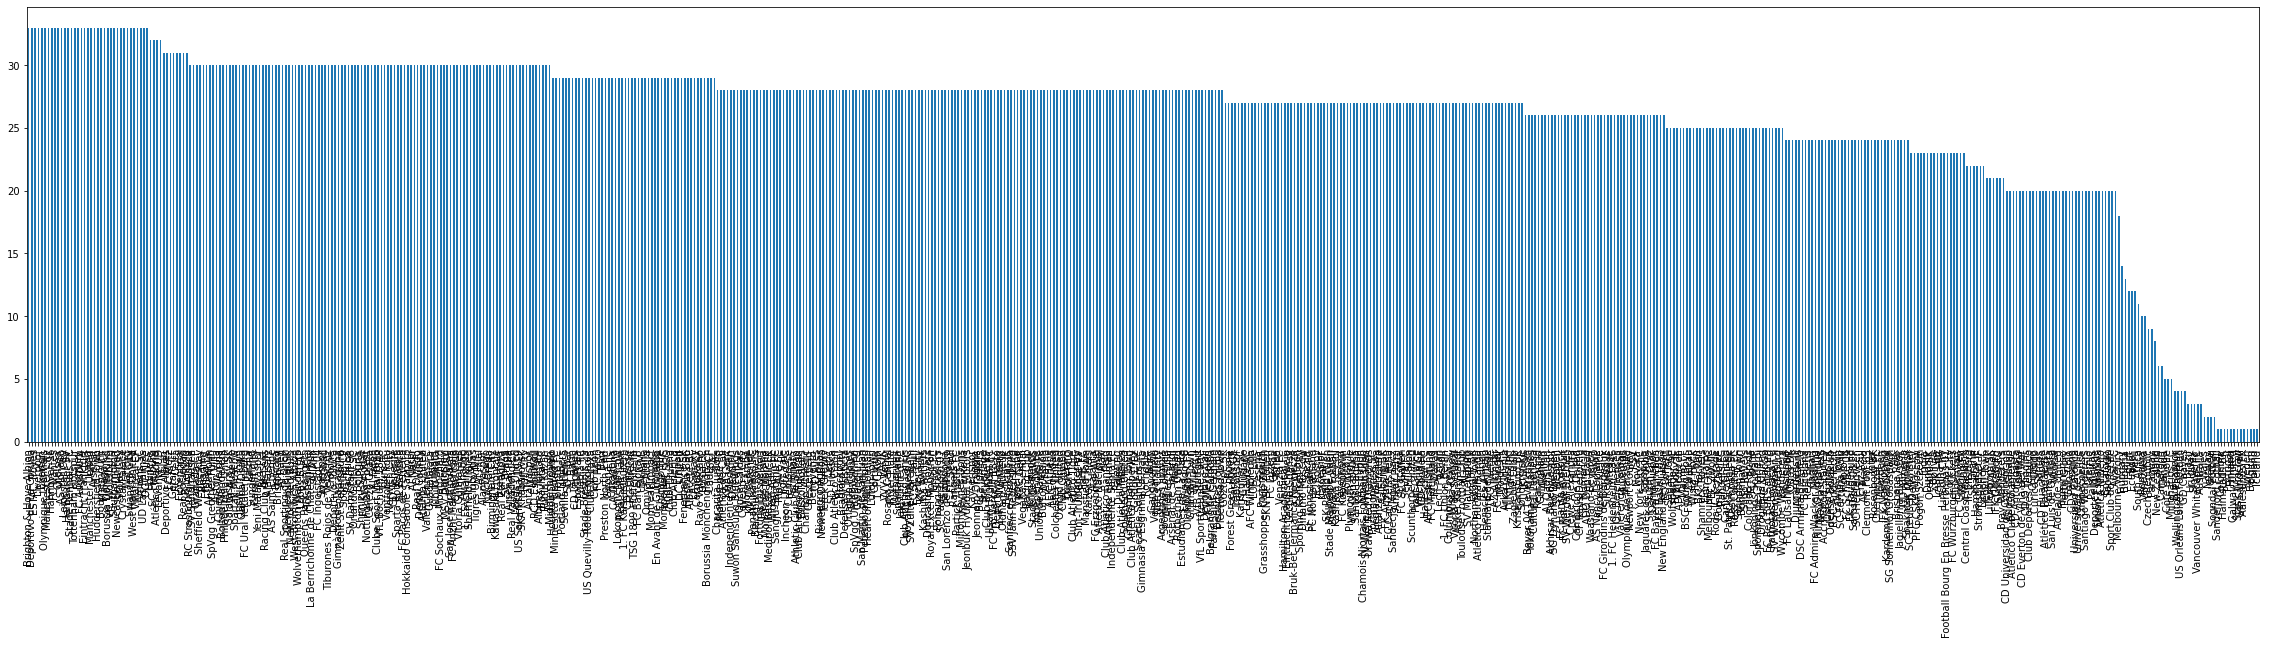

In [29]:
#df_fifa20.groupby('club').agg({'club':'count'}).plot.bar(figsize=(40,8))
df_fifa18['club'].value_counts().plot.bar(figsize=(40,8))

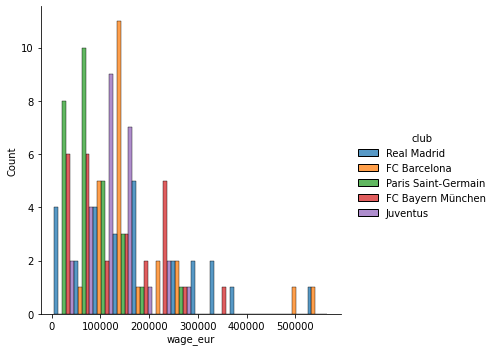

In [54]:
sal = df_fifa18[df_fifa18['club'].isin(['FC Barcelona','Real Madrid','Paris Saint-Germain','Juventus','FC Bayern München'])][['club','wage_eur']]
sns.displot(sal, x='wage_eur', hue='club', multiple='dodge')


In [ ]:
# 7) Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality');

#df_fifa20.groupby('nationality').agg({'age':'mean'})

pd.set_option('display.precision', 1)

df1 = df_fifa18.groupby('nationality').agg({'age':['mean','min','max']}).rename(columns={'age':'Fifa 18'})
df2 = df_fifa19.groupby('nationality').agg({'age':['mean','min','max']}).rename(columns={'age':'Fifa 19'})
df3 = df_fifa20.groupby('nationality').agg({'age':['mean','min','max']}).rename(columns={'age':'Fifa 20'})

df_total = pd.merge(df1, pd.merge(df2, df3, on='nationality'), on='nationality')

df_total.head(5)

Fifa 18         Fifa 19         Fifa 20        
                     mean min max    mean min max    mean min max
nationality                                                      
Afghanistan          22.0  19  27    22.5  20  26    24.5  22  27
Albania              24.7  18  33    25.0  18  34    24.8  17  33
Algeria              26.6  17  34    27.0  19  35    26.8  18  33
Angola               25.6  20  34    26.1  19  34    26.0  20  35
Antigua & Barbuda    22.4  20  26    22.8  20  27    22.9  18  28

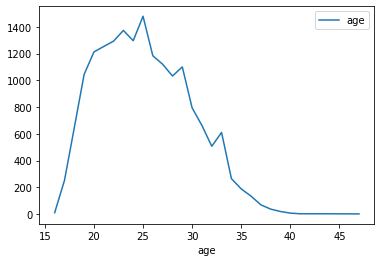

In [ ]:
# 8) Qual a número de jogadores por idade?

#pd.value_counts(df_fifa18['age'])

df_fifa18.groupby('age').agg({'age':'count'}).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4038092e8>],
      dtype=object)

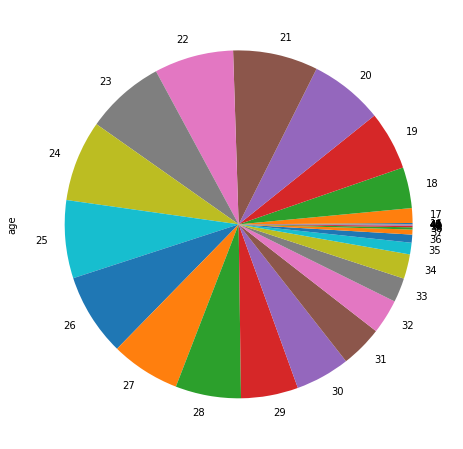

In [ ]:
df_fifa19.groupby('age').agg({'age':'count'}).plot.pie(subplots=True,legend=False,figsize=(8,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4038494a8>],
      dtype=object)

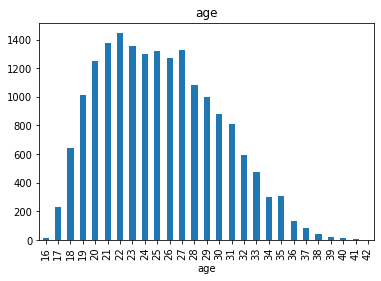

In [ ]:
df_fifa20.groupby('age').agg({'age':'count'}).plot(kind='bar',subplots=True,legend=False)

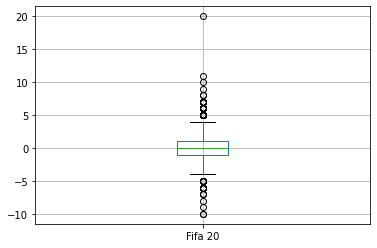

In [ ]:
# 9) Quantos jogadores possuem cada clube?

#pd.value_counts(df_fifa['club'])

# Diferença de jogadores do Fifa 20 para Fifa 18

df1 = df_fifa18.groupby('club').agg({'club':'count'}).rename(columns={'club':'Fifa 18'})
df2 = df_fifa19.groupby('club').agg({'club':'count'}).rename(columns={'club':'Fifa 19'})
df3 = df_fifa20.groupby('club').agg({'club':'count'}).rename(columns={'club':'Fifa 20'})

df_total = pd.merge(df1, pd.merge(df2, df3, on='club'), on='club')

df_total.diff(2, axis=1).boxplot(column='Fifa 20')

In [ ]:
df_total['Saldo'] = df_total['Fifa 20'] - df_total['Fifa 18']

df_total.sort_values('Saldo',ascending=False).head(10)

,Fifa 18,Fifa 19,Fifa 20,Saldo
club,,,,
Uruguay,3,3,23,20
Ecuador,12,14,23,11
Iceland,1,9,11,10
FC Barcelona,24,28,33,9
CD Huachipato,20,27,28,8
Universidad Católica,20,27,28,8
Juventus,26,25,33,7
CD O'Higgins,20,27,27,7
Cagliari,24,25,31,7


In [ ]:
# 10) Qual a média de idade por clube?

df_fifa.groupby('club').agg({'age':['mean','min','max']}).sort_values(('age','mean'),ascending=False)

In [ ]:
# 11) Qual a média de salário por país?

df_fifa.groupby('nationality').agg({'wage':'mean'}).sort_values('wage',ascending=False)

In [ ]:
# 12) Qual a média de salário por clube?

df_fifa20.groupby('club').agg({'wage_eur':'sum'}).sort_values('wage_eur',ascending=False)

,wage_eur
club,
Real Madrid,5354000
FC Barcelona,4950000
Manchester City,3984000
Juventus,3750000
Manchester United,2874000
...,...
Poland,0
Austria,0
Australia,0


In [ ]:
# 13) Qual a média de salário por idade?

df_fifa.groupby('age').agg({'wage':'mean'}).sort_values('wage',ascending=False)

,wage
age,
31,15977.37
29,14057.35
32,14045.30
28,13917.35
27,13591.22
...,...
17,2141.87
41,2000.00
16,1166.67


In [ ]:
# 14) Quanto cada clube gasta com pagamento de salários?

df_fifa.groupby('club').agg({'wage':'sum'}).sort_values('wage',ascending=False)

,wage
club,
Real Madrid,5.02e+06
FC Barcelona,4.84e+06
Manchester City,3.74e+06
Manchester United,3.39e+06
Juventus,3.29e+06
...,...
Shamrock Rovers,2.20e+04
Dalkurd FF,2.20e+04
Limerick FC,1.90e+04


In [ ]:
# 15) Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?

# É O VALOR MÁXIMO QUE O OVERALL DE UM JOGADOR PODERÁ ATINGIR NO FUTURO. SERÁ MAIOR OU IGUAL AO OVERALL.

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,1.10e+08,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.18e+08,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,7.20e+07,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.02e+08,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,8.10e+07,100000.0,2118,Right,3.0,4.0,5.0,High/ Medium,Lean,Yes,RM,10.0,"Jul 1, 2018",NaN,2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,...,62+3,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
26,209331,M. Salah,26,Egypt,88,89,Liverpool,6.95e+07,255000.0,2146,Left,3.0,3.0,4.0,High/ Medium,PLAYER_BODY_TYPE_25,Yes,RM,10.0,"Jul 1, 2017",NaN,2023,5'9,157lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,...,66+3,57+3,57+3,57+3,66+3,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,

In [ ]:
# 16) Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?


In [ ]:
# 17) Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?

df_fifa.groupby('club').agg({'potential':'sum','overall':'sum'}).sort_values('potential',ascending=False)

,potential,overall
club,,
FC Barcelona,2815,2575
Real Madrid,2793,2582
Manchester City,2769,2532
Manchester United,2728,2549
Chelsea,2727,2534
...,...,...
Ceará Sporting Club,1354,1354
Dalkurd FF,1337,1255
Sligo Rovers,1242,1076


In [ ]:
df_fifa.groupby('club').agg({'potential':'sum','overall':'sum'}).sort_values('overall',ascending=False)

,potential,overall
club,,
Real Madrid,2793,2582
FC Barcelona,2815,2575
Manchester United,2728,2549
Chelsea,2727,2534
Manchester City,2769,2532
...,...,...
Tromsø IL,1411,1254
Bray Wanderers,1440,1234
Sligo Rovers,1242,1076


In [ ]:
# 18) Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.

df_fifa[df_fifa['position'] == 'GK'].sort_values('potential',ascending=False)

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
3,193080,De Gea,27,Spain,91,93,Manchester United,7.20e+07,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,6.80e+07,94000.0,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 16, 2014",NaN,2021,6'2,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
229,230621,G. Donnarumma,19,Italy,82,93,Milan,2.90e+07,23000.0,1278,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jul 1, 2015",NaN,2021,6'5,198lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,12.0,12.0,34.0,8.0,28.0,12.0,14.0,24.0,28.0,46.0,54.0,64.0,74.0,38.0,24.0,72.0,34.0,72.0,18.0,30.0,26.0,14.0,50.0,24.0,68.0,20.0,14.0,16.0,88.0,78.0,72.0,78.0,88.0,€55.1M
18,192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,5.80e+07,240000.0,1328,Right,3.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jul 1, 2014",NaN,2022,6'2,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
177,206585,Kepa,23,Spain,83,91,Chelsea,2.85e+07,84000.0,1223,Right,1.0,4.0,1.0,Medium/ Medium,Lean,Yes,GK,13.0,"Aug 8, 2018",NaN,2025,6'1,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,11.0,17.0,32.0,18.0,10.0,25.0,19.0,36.0,16.0,34.0,33.0,41.0,79.0,39.0,25.0,71.0,37.0,51.0,14.0,18.0,21.0,15.0,55.0,24.0,63.0,19.0,18.0,16.0,84.0,80.0,76.0,80.0,84.0,€58.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,243110,Sun Qibin,26,China PR,50,52,Tianjin Quanjian FC,2.00e+04,2000.0,843,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,32.0,"Jan 1, 2018",NaN,2020,6'4,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,7.0,12.0,20.0,6.0,13.0,10.0,12.0,23.0,13.0,30.0,30.0,22.0,50.0,24.0,23.0,31.0,24.0,62.0,8.0,17.0,12.0,6.0,50.0,12.0,30.0,46.0,11.0,10.0,50.0,46.0,51.0,48.0,50.0,€45K
18052,243073,Teng Shangkun,27,China PR,50,51,Tianjin TEDA FC,2.00e+04,1000.0,868,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,33.0,"Jan 1, 2018",NaN,2018,6'1,172lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,8.0,13.0,27.0,5.0,13.0,14.0,12.0,18.0,19.0,20.0,31.0,29.0,40.0,33.0,24.0,55.0,45.0,52.0,6.0,19.0,7.0,5.0,40.0,17.0,58.0,28.0,10.0,13.0,46.0,56.0,55.0,45.0,53.0,€45K
18025,211490,J. Miszczuk,27,Poland,

In [ ]:
df_fifa[df_fifa['position'] == 'GK'].sort_values('overall',ascending=False)

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
3,193080,De Gea,27,Spain,91,93,Manchester United,7.20e+07,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,6.80e+07,94000.0,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 16, 2014",NaN,2021,6'2,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,5.80e+07,240000.0,1328,Right,3.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jul 1, 2014",NaN,2022,6'2,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,192119,T. Courtois,26,Belgium,89,90,Real Madrid,5.35e+07,240000.0,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,"Aug 9, 2018",NaN,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,167495,M. Neuer,32,Germany,89,89,FC Bayern München,3.80e+07,130000.0,1473,Right,5.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 1, 2011",NaN,2021,6'4,203lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,243158,L. Wahlstedt,18,Sweden,48,65,Dalkurd FF,5.00e+04,1000.0,738,Right,1.0,2.0,1.0,Medium/ Medium,Lean,No,GK,30.0,"Apr 4, 2018",NaN,2018,6'0,176lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,7.0,11.0,22.0,6.0,8.0,10.0,8.0,20.0,12.0,24.0,28.0,33.0,40.0,29.0,15.0,48.0,20.0,38.0,6.0,20.0,10.0,7.0,18.0,12.0,28.0,16.0,11.0,10.0,47.0,46.0,50.0,45.0,51.0,€94K
18180,221669,M. Hurst,22,Scotland,48,58,St. Johnstone FC,4.00e+04,1000.0,987,Right,1.0,2.0,1.0,Medium/ Medium,Lean,No,GK,30.0,"Jul 1, 2013",NaN,2019,6'1,172lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,15.0,15.0,26.0,14.0,13.0,12.0,19.0,19.0,25.0,40.0,42.0,45.0,47.0,52.0,25.0,55.0,33.0,58.0,20.0,20.0,29.0,13.0,20.0,29.0,28.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0,€78K
18183,53748,K. Pilkingt

In [ ]:
# 19) Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?

df_fifa.sort_values('sprintspeed',ascending=False)

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
1968,213956,Adama,22,Spain,75,85,Wolverhampton Wanderers,1.05e+07,54000.0,1772,Right,1.0,2.0,3.0,High/ Low,Stocky,No,RW,37.0,"Aug 8, 2018",NaN,2023,5'10,168lbs,68+2,68+2,68+2,74+2,72+2,72+2,72+2,74+2,71+2,71+2,71+2,74+2,63+2,63+2,63+2,74+2,...,51+2,42+2,42+2,42+2,51+2,72.0,61.0,40.0,66.0,52.0,89.0,65.0,42.0,56.0,83.0,97.0,96.0,81.0,63.0,83.0,74.0,73.0,75.0,83.0,55.0,54.0,29.0,62.0,57.0,47.0,70.0,16.0,26.0,23.0,13.0,9.0,11.0,12.0,7.0,€22.1M
55,222492,L. Sané,22,Germany,86,92,Manchester City,6.10e+07,195000.0,2090,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,LW,19.0,"Aug 2, 2016",NaN,2021,6'0,165lbs,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,82+2,82+2,82+2,83+2,74+2,74+2,74+2,83+2,...,61+2,52+2,52+2,52+2,61+2,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,8.10e+07,100000.0,2118,Right,3.0,4.0,5.0,High/ Medium,Lean,Yes,RM,10.0,"Jul 1, 2018",NaN,2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,...,62+3,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
1489,216258,I. Bebou,24,Togo,76,81,Hannover 96,1.05e+07,28000.0,1832,Right,1.0,3.0,4.0,High/ Medium,Lean,No,RM,13.0,"Aug 31, 2017",NaN,2021,6'0,170lbs,72+2,72+2,72+2,76+2,74+2,74+2,74+2,76+2,73+2,73+2,73+2,75+2,66+2,66+2,66+2,75+2,...,56+2,45+2,45+2,45+2,56+2,66.0,74.0,55.0,72.0,63.0,81.0,63.0,46.0,53.0,77.0,91.0,95.0,84.0,73.0,75.0,66.0,69.0,79.0,60.0,64.0,43.0,31.0,71.0,65.0,67.0,66.0,26.0,35.0,33.0,10.0,11.0,12.0,11.0,11.0,€19.7M
36,173731,G. Bale,28,Wales,88,88,Real Madrid,6.00e+07,355000.0,2279,Left,4.0,3.0,4.0,High/ Medium,Lean,Yes,ST,11.0,"Sep 2, 2013",NaN,2022,6'1,181lbs,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,85+3,80+3,80+3,80+3,85+3,...,71+3,67+3,67+3,67+3,71+3,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,239679,P. Mazzocchi,22,Italy,62,69,Perugia,3.50e+05,1000.0,1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13280,244543,Y. Ammour,19,France,62,77,Montpellier HSC,6.50e+05,2000.0,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13281,212800,Jwa Joon Hyeop,27,Korea Republic,62,62,Gyeongnam FC,3.00e+05,10

In [ ]:
# 20) Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?

df_fifa.sort_values('shotpower',ascending=False).head(5)

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
378,189362,Hulk,31,Brazil,81,81,Shanghai SIPG FC,1.55e+07,25000.0,2102,Left,4.0,3.0,4.0,High/ Medium,Stocky,Yes,RCM,10.0,"Jul 1, 2017",NaN,2020,5'11,187lbs,81+3,81+3,81+3,79+3,81+3,81+3,81+3,79+3,79+3,79+3,79+3,79+3,75+3,75+3,75+3,79+3,...,61+3,59+3,59+3,59+3,61+3,76.0,81.0,69.0,78.0,73.0,82.0,78.0,81.0,72.0,79.0,81.0,80.0,69.0,82.0,59.0,94.0,69.0,86.0,92.0,90.0,83.0,48.0,82.0,75.0,78.0,75.0,50.0,41.0,28.0,6.0,10.0,7.0,11.0,12.0,€34.1M
1348,169051,F. Guarín,32,Colombia,76,76,Shanghai Greenland Shenhua FC,6.00e+06,16000.0,2102,Right,3.0,4.0,4.0,High/ Medium,Stocky,No,LDM,13.0,"Jan 27, 2016",NaN,2019,6'0,176lbs,73+3,73+3,73+3,72+3,73+3,73+3,73+3,72+3,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,...,67+3,68+3,68+3,68+3,67+3,70.0,70.0,63.0,74.0,67.0,75.0,68.0,84.0,76.0,78.0,68.0,63.0,65.0,70.0,77.0,93.0,70.0,79.0,90.0,84.0,77.0,68.0,70.0,75.0,76.0,76.0,60.0,66.0,60.0,12.0,13.0,13.0,15.0,13.0,€12.9M
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,6.50e+06,11000.0,2048,Left,3.0,3.0,4.0,Medium/ Low,Normal,Yes,RF,10.0,"Jul 1, 2017",NaN,2019,6'0,183lbs,77+3,77+3,77+3,76+3,77+3,77+3,77+3,76+3,76+3,76+3,76+3,75+3,71+3,71+3,71+3,75+3,...,59+3,56+3,56+3,56+3,59+3,75.0,77.0,66.0,76.0,88.0,78.0,80.0,75.0,67.0,78.0,76.0,75.0,67.0,76.0,70.0,92.0,71.0,70.0,83.0,80.0,70.0,36.0,75.0,79.0,83.0,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,€8.1M
36,173731,G. Bale,28,Wales,88,88,Real Madrid,6.00e+07,355000.0,2279,Left,4.0,3.0,4.0,High/ Medium,Lean,Yes,ST,11.0,"Sep 2, 2013",NaN,2022,6'1,181lbs,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,85+3,80+3,80+3,80+3,85+3,...,71+3,67+3,67+3,67+3,71+3,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M


In [ ]:
# 21) Quem são os outliers em termos de salário?

# Vamos usar o método np.percentile(array, q = [p1, p2, p3, ..., p99])
percentis = np.percentile(df_fifa['wage'], q = [1, 5, 25, 50, 55, 75, 99])

# Primeiro Quartil
q1 = percentis[2]
q3 = percentis[5]
lim_inferior_outlier = q1 - 1.5 * (q3 - q1)
lim_superior_outlier = q3 + 1.5 * (q3 - q1)

print(lim_inferior_outlier)
print(q1)
print(q3)
print(lim_superior_outlier)
print(percentis[-1])

#df_fifa[df_fifa['wage'] > lim_superior_outlier]
df_fifa[df_fifa['wage'] > percentis[-1]]

-11000.0
1000.0
9000.0
21000.0
105000.0


,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,1.10e+08,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.18e+08,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,7.20e+07,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.02e+08,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,176944,M. Fellaini,30,Belgium,79,79,Manchester United,1.15e+07,120000.0,1994,Right,3.0,3.0,3.0,Medium/ Medium,Lean,Yes,CM,8.0,"Sep 2, 2013",NaN,2020,6'4,187lbs,76+3,76+3,76+3,69+3,73+3,73+3,73+3,69+3,72+3,72+3,72+3,70+3,75+3,75+3,75+3,70+3,...,70+3,78+3,78+3,78+3,70+3,61.0,73.0,93.0,81.0,68.0,67.0,64.0,46.0,66.0,82.0,41.0,48.0,47.0,81.0,49.0,75.0,64.0,75.0,91.0,65.0,94.0,74.0,84.0,73.0,64.0,78.0,77.0,77.0,60.0,8.0,6.0,9.0,15.0,16.0,€21.3M
717,152908,A. Young,32,England,79,79,Manchester United,7.00e+06,110000.0,2120,Right,2.0,3.0,4.0,High/ Medium,Lean,Yes,LB,18.0,"Jul 1, 2011",NaN,2019,5'9,143lbs,70+2,70+2,70+2,75+2,73+2,73+2,73+2,75+2,75+2,75+2,75+2,75+2,75+2,75+2,75+2,75+2,...,76+2,72+2,72+2,72+2,76+2,84.0,64.0,57.0,79.0,71.0,77.0,86.0,75.0,70.0,79.0,77.0,72.0,77.0,80

In [ ]:
# 22) Quem são os outliers em termos de potência no chute?

# NÃO HÁ

percentis = np.percentile(df_fifa[~np.isnan(df_fifa['shotpower'])]['shotpower'], q = [1, 5, 25, 50, 55, 75, 99])

q1 = percentis[2]
q3 = percentis[5]
lim_inferior_outlier = q1 - 1.5 * (q3 - q1)
lim_superior_outlier = q3 + 1.5 * (q3 - q1)

print(lim_inferior_outlier)
print(q1)
print(q3)
print(lim_superior_outlier)
print(percentis[-1])

#df_fifa[df_fifa['shotpower'] > lim_superior_outlier]
df_fifa[df_fifa['shotpower'] > percentis[-1]].sort_values('shotpower',ascending=False)

10.5
45.0
68.0
102.5
84.0


,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
378,189362,Hulk,31,Brazil,81,81,Shanghai SIPG FC,1.55e+07,25000.0,2102,Left,4.0,3.0,4.0,High/ Medium,Stocky,Yes,RCM,10.0,"Jul 1, 2017",NaN,2020,5'11,187lbs,81+3,81+3,81+3,79+3,81+3,81+3,81+3,79+3,79+3,79+3,79+3,79+3,75+3,75+3,75+3,79+3,...,61+3,59+3,59+3,59+3,61+3,76.0,81.0,69.0,78.0,73.0,82.0,78.0,81.0,72.0,79.0,81.0,80.0,69.0,82.0,59.0,94.0,69.0,86.0,92.0,90.0,83.0,48.0,82.0,75.0,78.0,75.0,50.0,41.0,28.0,6.0,10.0,7.0,11.0,12.0,€34.1M
1348,169051,F. Guarín,32,Colombia,76,76,Shanghai Greenland Shenhua FC,6.00e+06,16000.0,2102,Right,3.0,4.0,4.0,High/ Medium,Stocky,No,LDM,13.0,"Jan 27, 2016",NaN,2019,6'0,176lbs,73+3,73+3,73+3,72+3,73+3,73+3,73+3,72+3,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,...,67+3,68+3,68+3,68+3,67+3,70.0,70.0,63.0,74.0,67.0,75.0,68.0,84.0,76.0,78.0,68.0,63.0,65.0,70.0,77.0,93.0,70.0,79.0,90.0,84.0,77.0,68.0,70.0,75.0,76.0,76.0,60.0,66.0,60.0,12.0,13.0,13.0,15.0,13.0,€12.9M
36,173731,G. Bale,28,Wales,88,88,Real Madrid,6.00e+07,355000.0,2279,Left,4.0,3.0,4.0,High/ Medium,Lean,Yes,ST,11.0,"Sep 2, 2013",NaN,2022,6'1,181lbs,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,85+3,80+3,80+3,80+3,85+3,...,71+3,67+3,67+3,67+3,71+3,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9.00e+06,38000.0,1959,Right,3.0,4.0,2.0,Medium/ Medium,Lean,No,CB,29.0,"Jul 1, 2016",NaN,2020,6'6,201lbs,70+3,70+3,70+3,62+3,66+3,66+3,66+3,62+3,65+3,65+3,65+3,63+3,70+3,70+3,70+3,63+3,...,75+3,82+3,82+3,82+3,75+3,45.0,57.0,94.0,76.0,60.0,60.0,52.0,76.0,70.0,68.0,60.0,65.0,46.0,85.0,36.0,92.0,45.0,61.0,83.0,82.0,72.0,83.0,53.0,59.0,60.0,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,€15.3M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,189165,J. Shelvey,26,England,78,80,Newcastle United,1.25e+07,50000.0,2050,Right,2.0,3.0,3.0,Low/ Medium,Lean,Yes,CM,8.0,"Jan 12, 2016",NaN,2021,6'0,176lbs,71+2,71+2,71+2,72+2,74+2,74+2,74+2,72+2,75+2,75+2,75+2,74+2,77+2,77+2,77+2,74+2,...,67+2,67+2,67+2,67+2,67+2,73.0,67.0,67.0,84.0,59.0,74.0,69.0,73.0,85.0,76.0,63.0,63.0,62.0,72.0,65.0,85.0,64.0,76.0,71.0,81.0,84.0,63.0,70.0,83.0,71.0,78.0,60.0,65.0,61.0,14.0,11.0,15.0,8.0,16.0,€24.7M
872,180432,Hernanes,33,Brazil,78,78,Hebei China Fortune FC,6.00e+06,19000.0,2022,Right,3.0,5.0,4.0,Medium/ Medium,Normal,No,RDM,10.0,"Feb 9, 2017",NaN,2019,5'11,170lbs,67+3,67+3,67+3,71+3,71+3,71+3,71+3,71+3,74+3,74+3,74+3,72+3,75+3,75+3,75+3,72+3,...,69+3,66+3,66+3,66+3,69+3,79.0,57.0,60.0,82.0,76.0,74.0,84.0,85.0,78.0,79.